OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:            Hippocampus   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     8.769
Date:                Wed, 22 Jan 2025   Prob (F-statistic):            0.00388
Time:                        20:33:49   Log-Likelihood:                -57.742
No. Observations:                  16   AIC:                             121.5
Df Residuals:                      13   BIC:                             123.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.8796      

C:\Users\Iman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)



Model Comparison Results:

                        Model        MAE  Spearman Corr  Spearman Corr²
0           Linear Regression   8.959287       0.758115        0.574739
1            Ridge Regression   8.942450       0.758115        0.574739
2            Lasso Regression   9.147674       0.758115        0.574739
3       ElasticNet Regression   9.319757       0.758115        0.574739
4               Random Forest   7.001250       0.600298        0.360357
5           Gradient Boosting   7.208622       0.647495        0.419250
6   Support Vector Regression  10.370688       0.500002        0.250002
7               Decision Tree   6.875000       0.602396        0.362881
8      K-Neighbors Regression   9.387500       0.644757        0.415712
9            Gaussian Process  31.694860       0.078171        0.006111
10                    XGBoost   7.158510       0.604722        0.365689

Best Model: Linear Regression
Mean Absolute Error (MAE): 8.959287045950752
Spearman Correlation Squared (R²

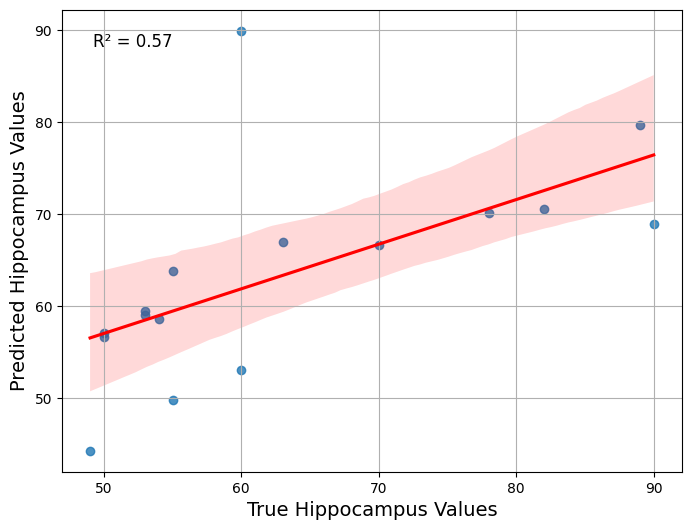

In [1]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Manually creating the DataFrame with the provided data
data = {
    'F1': [
        -0.070347284, -0.10696164, 0.138384916, 0.212072435, 0.076388889, 0.01192053,
        0.484777518, 0.015388889, 0.294432867, 0.360808709, 0.329436418, 0.30185067,
        -0.405509908, -0.439097983, -0.33200443, -0.340163223
    ],
    'F2': [
        0.330326162, -0.138211382, 0.479882237, 0.157152925, 0.15146147, 0.348432056,
        -0.111501317, 0.257963875, 0.08259587, -0.241042345, 0.091688089, 0.060550459,
        -0.072562358, 0.110103627, 0.387791212, -0.01793722
    ],
    'Hippocampus': [
        60, 70, 50, 63, 55, 50, 60, 53, 78, 89, 90, 82, 53, 55, 49, 54
    ]
}

# Create a DataFrame from the provided data
df = pd.DataFrame(data)

# Statistical Test: OLS Regression for Hippocampus Prediction
X = df[['F1', 'F2']]  # Feature matrix
y = df['Hippocampus']  # Target variable

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
ols_model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print("OLS Regression Summary:\n")
print(ols_model.summary())

# Prepare features (X) and target variable (y) for the machine learning models
X = df[['F1', 'F2']]  # Using F1 and F2 as features
y = df['Hippocampus']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'K-Neighbors Regression': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror')
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Store results for comparison
results = []
best_model_name = None
best_mae = float('inf')
best_spearman_corr = -1
y_true_all = []
y_pred_all = []

# Perform Leave-One-Out Cross-Validation for each model
for model_name, model in models.items():
    y_true, y_pred = [], []

    for train_index, test_index in loo.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)

        y_true.append(y_test)
        y_pred.append(y_pred_test)

    # Flatten the lists
    y_true = [item for sublist in y_true for item in sublist]
    y_pred = [item for sublist in y_pred for item in sublist]

    # Compute MAE and Spearman correlation
    mae = mean_absolute_error(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    spearman_corr_squared = spearman_corr ** 2

    # Store model results
    results.append({
        'Model': model_name,
        'MAE': mae,
        'Spearman Corr': spearman_corr,
        'Spearman Corr²': spearman_corr_squared
    })

    # Check if this is the best model
    if spearman_corr > best_spearman_corr:
        best_spearman_corr = spearman_corr
        best_model_name = model_name
        best_mae = mae
        y_true_all, y_pred_all = y_true, y_pred

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nModel Comparison Results:\n")
print(results_df)

# Print best model's performance
print(f"\nBest Model: {best_model_name}")
print(f"Mean Absolute Error (MAE): {best_mae}")
print(f"Spearman Correlation Squared (R²): {best_spearman_corr ** 2}")

# Visualization of model's performance
plot_df = pd.DataFrame({'True Values': y_true_all, 'Predicted Values': y_pred_all})

plt.figure(figsize=(8, 6))
sns.regplot(x='True Values', y='Predicted Values', data=plot_df, ci=95, line_kws={"color": "red"})
plt.xlabel('True Hippocampus Values', fontsize=14)
plt.ylabel('Predicted Hippocampus Values', fontsize=14)
plt.grid(True)
plt.text(0.05, 0.95, f'R² = {best_spearman_corr ** 2:.2f}', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=12)
plt.show()
